In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<img src="./image-1.png" alt="drawing" width="400"/>

In [96]:
# Install QuTiP if not already installed
! pip install qutip

Defaulting to user installation because normal site-packages is not writeable


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
_2PI = 2*np.pi


# Brief introduction about NV centers and QuTiP
print("QuTiP: Quantum Toolbox in Python")
print("NV centers: A nitrogen-vacancy center in diamond is a system that consists of a nitrogen atom adjacent to a vacancy in the diamond lattice.")

_2PI = 2*np.pi

QuTiP: Quantum Toolbox in Python
NV centers: A nitrogen-vacancy center in diamond is a system that consists of a nitrogen atom adjacent to a vacancy in the diamond lattice.


In [98]:
# Define basic quantum gates
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()
pi2_x = qt.rx(np.pi/2)
pi2_y = qt.ry(np.pi/2)
H = qt.hadamard_transform(1)
print("X-gate:", X)

# Apply gates to a state (example)
initial_state = qt.basis(2, 0)  # Ground state
print("Initial state:", initial_state)

# Apply X gate
state_after_X = X * initial_state
print("State after X gate:", state_after_X)

# Apply H gate
state_after_H = H * initial_state
print("State after H gate:", state_after_H)

X-gate: Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]
Initial state: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
State after X gate: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
State after H gate: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]


/var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_68947/140549949.py:5: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  pi2_x = qt.rx(np.pi/2)
/var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_68947/140549949.py:6: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  pi2_y = qt.ry(np.pi/2)
/var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_68947/140549949.py:7: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import 

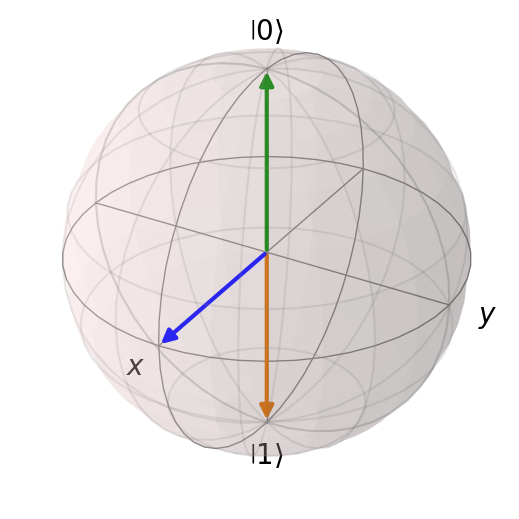

In [99]:
from qutip import Bloch

b = Bloch()
b.add_states(initial_state)
b.add_states(state_after_X)
b.add_states(state_after_H)
b.show()

Hamiltonian Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 10.05309649   0.        ]
 [  0.         -10.05309649]]


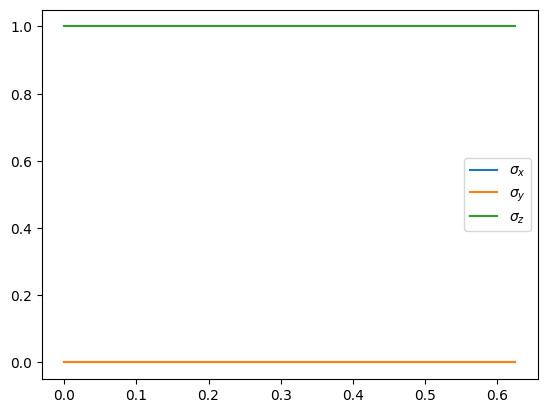

In [100]:
w01 = 3.2*_2PI
H = w01 * qt.sigmaz() / 2

print("Hamiltonian", H)

psi0 = qt.basis(2, 0) #+ qt.basis(2, 1)).unit()
times = np.linspace(0, 2 * _2PI/w01, 50)
result = qt.mesolve(H, psi0, times, c_ops=[], e_ops=[qt.sigmax(), qt.sigmay(), qt.sigmaz()])

plt.plot(times, result.expect[0], label=r"$\sigma_x$")
plt.plot(times, result.expect[1], label=r"$\sigma_y$")
plt.plot(times, result.expect[2], label=r"$\sigma_z$")

plt.legend()

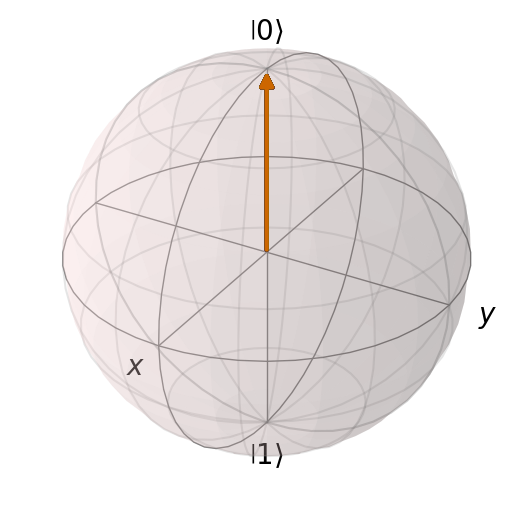

In [101]:
result = qt.mesolve(H, psi0, times)
b = Bloch()
b.add_states(result.states)
b.show()

In [102]:
# Hamiltonian for a single NV center (3-level system)
D = 2.87  # Zero-field splitting in GHz
B = 0.01  # Magnetic field in Tesla
g_e = -28.03  # Gyromagnetic ratio of the electron, units are GHz/T

# Define the electron spin (S=1) operators
Sz = qt.jmat(1, 'z')  # Sz operator
Sx = qt.jmat(1, 'x')
Sy = qt.jmat(1, 'y')

print("Sz opretaror", Sz)

H0 = (D * (Sz**2 - 2/3) + g_e * B * Sz)*_2PI

H0


Sz opretaror Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[  4.2497371    0.           0.        ]
 [  0.         -12.02182789   0.        ]
 [  0.           0.           7.77209079]]

In [103]:
# Finding eigenenergies and eigenstates
eigenenergies, eigenstates = H0.eigenstates()
# Sorting eigenvalues and corresponding eigenvectors
# The expected order in energy for spin-1 in a magnetic field (Sz basis) is |0>, |-1>, |+1>
index = np.argsort(eigenenergies)
sorted_energies = eigenenergies[index]
sorted_states = eigenstates[index]

# Display sorted eigenvalues
print("Sorted Eigenproblem (GHz):")
print(sorted_energies)
print(sorted_states)

# Calculate transition frequencies (assuming |0> is the lowest energy state)
frequency_0_to_minus1 = np.abs(sorted_energies[1] - sorted_energies[0])
frequency_0_to_1 = np.abs(sorted_energies[2] - sorted_energies[0])

w01 = (D + g_e*B)*_2PI
print('\nTransition 01 that we expect D + g_e*B : {:.2f} GHz'.format(w01/_2PI))

# Display transition frequencies
print("\nTransition Frequencies (GHz):")
print("Frequency from |0> to |-1>: {:.2f} GHz".format(frequency_0_to_minus1/_2PI))
print("Frequency from |0> to |+1>: {:.2f} GHz".format(frequency_0_to_1/_2PI))


Sorted Eigenproblem (GHz):
[-12.02182789   4.2497371    7.77209079]
[Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]]
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]]
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]]                                                       ]

Transition 01 that we expect D + g_e*B : 2.59 GHz

Transition Frequencies (GHz):
Frequency from |0> to |-1>: 2.59 GHz
Frequency from |0> to |+1>: 3.15 GHz


In [104]:
qt.basis(3, 1), qt.basis(3, 0), qt.basis(3, 2)

(Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]],
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]],
 Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]])

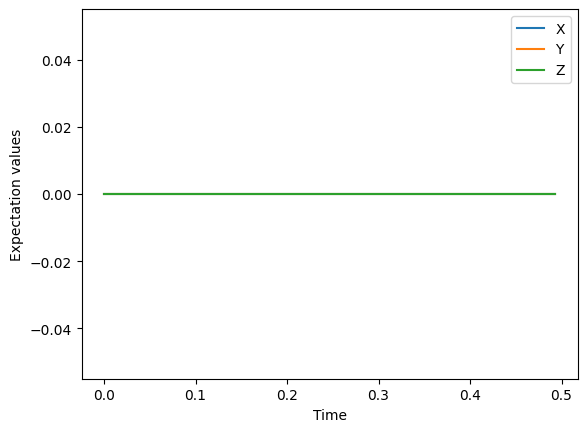

In [123]:
# Time evolution of states using mesolve
t = np.linspace(0, _2PI/w01, 100)  # Time array
initial_state = qt.basis(3, 1)  # Initial state
# initial_state = (qt.basis(3, 1) + qt.basis(3, 0)).unit()  # Initial state

H = H0.copy()

# Solve the Schrodinger equation
result = qt.mesolve(H, initial_state, t)

exp_sz = [qt.expect(Sz, state) for state in result.states]
exp_sy = [qt.expect(Sy, state) for state in result.states]
exp_sx = [qt.expect(Sx, state) for state in result.states]

# Plot results
fig, ax = plt.subplots()
ax.plot(t, exp_sx, label='X')
ax.plot(t, exp_sy, label='Y')
ax.plot(t, exp_sz, label='Z')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend()
plt.show()


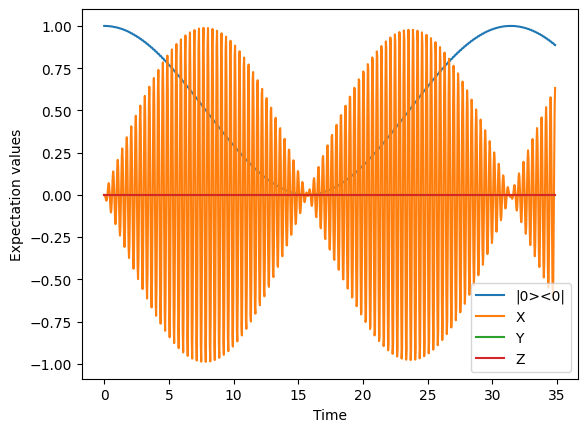

In [161]:
pulse = lambda t, args={'w': 1.05, "amp": 1}: np.sin(args['w'] * t) * args['amp']

B = 0
H = (D * (Sz**2 - 2/3) + g_e * B * Sz) * _2PI
w01 = (D + g_e * B) * _2PI
# Time evolution of states using mesolve
times = np.linspace(0, _2PI/w01*100, 1000)  # Time array
initial_state = qt.basis(3, 1)  # Initial state
# initial_state = (qt.basis(3, 1) + qt.basis(3, 0)).unit()  # Initial state

# Solve the Schrodinger equation
result = qt.mesolve([H, [Sx, pulse]], initial_state, times, args={"w": w01*1., 'amp': 0.2})

exp_0 = [qt.expect(initial_state * initial_state.dag(), state) for state in result.states]
exp_sz = [qt.expect(Sz, state) for state in result.states]
exp_sy = [qt.expect(Sy, state) for state in result.states]
exp_sx = [qt.expect(Sx, state) for state in result.states]

# Plot results
fig, ax = plt.subplots()
ax.plot(times, exp_0, label='|0><0|')
ax.plot(times, exp_sx, label='X')
ax.plot(times, exp_sy, label='Y')
ax.plot(times, exp_sz, label='Z')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend()
plt.show()

In [151]:
times[-1]

49.28293332019122

0.4928293332019122

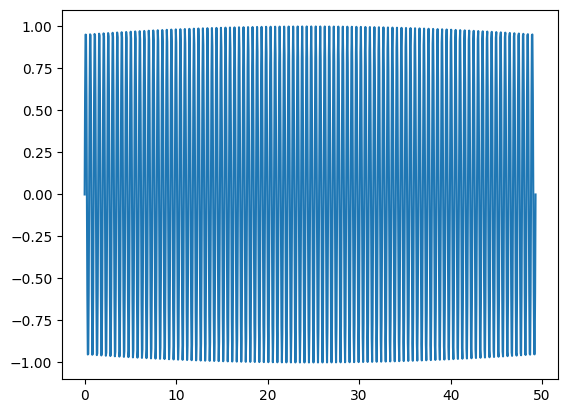

In [154]:
plt.plot(times, pulse(times, args={'w':w01, "amp":1}))
1/w01 * _2PI

### ODMR

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from tqdm import tqdm

# Constants
D = 2.87  # Zero-field splitting in GHz
g_e = -28.03  # Gyromagnetic ratio of the electron, units are GHz/T
_2PI = 2 * np.pi  # Two times pi for conversion to radians

# Define the spin-1 matrices
Sz = qt.jmat(1, 'z')
Sx = qt.jmat(1, 'x')
Sy = qt.jmat(1, 'y')

# Magnetic fields in Tesla
B_fields = [0, 0.01, 0.02, 0.03]  # Example values, [T]

# Pulse definition
def pulse(t, args):
    return np.sin(args['w'] * t) * args['amp']

# Frequencies to scan (around the zero-field splitting, converted to rad/s)
frequency_range = np.linspace(0.7 * D * _2PI, 1.3 * D * _2PI, 100)

# DataFrame to store results
df_results = pd.DataFrame({})

_colors = ['black', 'r', 'g', 'b']

for i, B in enumerate(tqdm(B_fields)):
    # Hamiltonian for this value of B
    H0 = (D * (Sz**2 - 2/3 * qt.qeye(3)) + g_e * B * Sz) * _2PI
    fluorescence = []
    
    for w in frequency_range:
        # Time array (set to capture one period of the oscillation)
        times = np.linspace(0, 50, 200)
        
        # Initial state (can vary depending on the experiment)
        initial_state = qt.basis(3, 1)  # Ground state
        
        # Time-dependent Hamiltonian
        H = [H0, [Sx, pulse]]
        
        # Solve the Schrödinger equation
        result = qt.mesolve(H, initial_state, times, args={"w": w, 'amp': 0.01}).states[-1]
        
        # Append results to DataFrame
        df_results = pd.concat([df_results, pd.DataFrame({'B': B, 'freq': w / _2PI,
                                         'sz': qt.expect(Sz, result),
                                           '|0><0|': qt.expect(initial_state * initial_state.dag(), result)}, index=[0])
                                ], ignore_index=True)


100%|██████████| 4/4 [00:12<00:00,  3.11s/it]


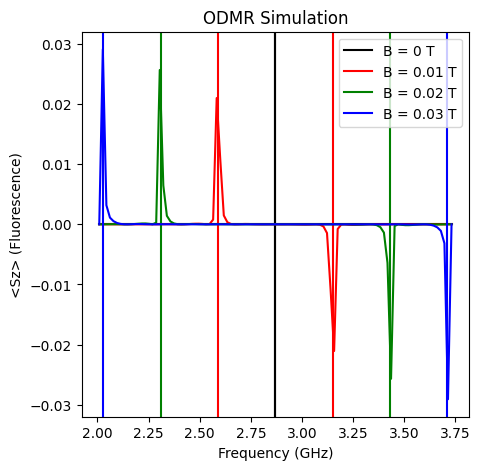

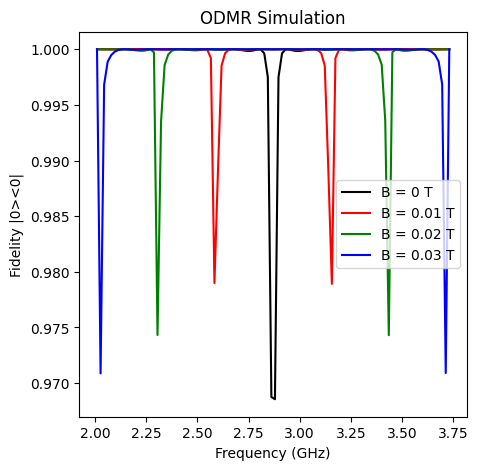

In [183]:
# Plotting results
fig, ax = plt.subplots(figsize=(5, 5))
for i, B in enumerate(B_fields):
    subset = df_results[df_results['B'] == B]
    ax.plot(subset['freq'], subset['sz'], label=f'B = {B} T', c=_colors[i])
    ax.axvline(D - g_e * B, c=_colors[i])
    ax.axvline(D + g_e * B, c=_colors[i])
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('<Sz> (Fluorescence)')
ax.set_title('ODMR Simulation')
ax.legend()
plt.show()

# Plotting results
fig, ax = plt.subplots(figsize=(5, 5))
for i, B in enumerate(B_fields):
    subset = df_results[df_results['B'] == B]
    ax.plot(subset['freq'], subset['|0><0|'], label=f'B = {B} T', c=_colors[i])
    # ax.axvline(D - g_e * B, c=_colors[i])
    # ax.axvline(D + g_e * B, c=_colors[i])
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Fidelity |0><0|')
ax.set_title('ODMR Simulation')
ax.legend()
plt.show()

100%|██████████| 4/4 [00:09<00:00,  2.37s/it]


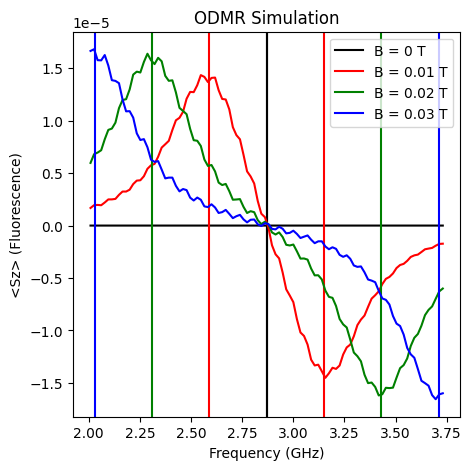

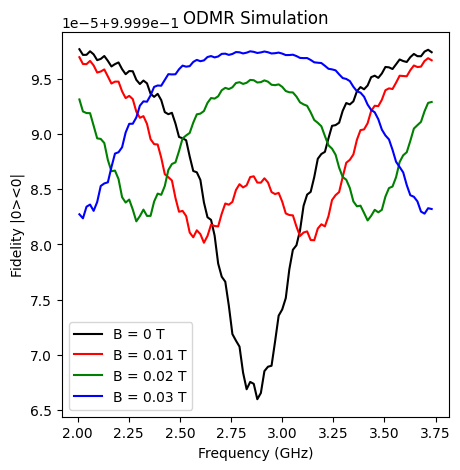

In [185]:
T1_plus1_to_0 = 1#1e3
T1_minus1_to_0 = 1#1e3
T2 = 1#0.5e3

# Constants for decay and dephasing rates
gamma_plus1_to_0 = 1/T1_plus1_to_0  # T1 decay rate from |+1> to |0>
gamma_minus1_to_0 = 1/T1_minus1_to_0  # T1 decay rate from |-1> to |0>
gamma_phi = 1/T2  # Dephasing rate for T2 processes

# Define basis states for convenience
plus1 = qt.basis(3, 2)
zero = qt.basis(3, 1)
minus1 = qt.basis(3, 0)

# T1 Collapse operators
C_plus1_to_0 = np.sqrt(gamma_plus1_to_0) * qt.Qobj(np.outer(zero, plus1))  # |0><+1|
C_minus1_to_0 = np.sqrt(gamma_minus1_to_0) * qt.Qobj(np.outer(zero, minus1))  # |0><-1|

# T2 Collapse operators (simplified model using overall dephasing)
C_dephase_plus1 = np.sqrt(gamma_phi) * qt.Qobj(np.outer(plus1, plus1))  # |+1><+1|
C_dephase_zero = np.sqrt(gamma_phi) * qt.Qobj(np.outer(zero, zero))  # |0><0|
C_dephase_minus1 = np.sqrt(gamma_phi) * qt.Qobj(np.outer(minus1, minus1))  # |-1><-1|

# Collect all collapse operators
collapse_operators = [C_plus1_to_0, C_minus1_to_0, C_dephase_plus1, C_dephase_zero, C_dephase_minus1]



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from tqdm import tqdm

# Constants
D = 2.87  # Zero-field splitting in GHz
g_e = -28.03  # Gyromagnetic ratio of the electron, units are GHz/T
_2PI = 2 * np.pi  # Two times pi for conversion to radians

# Define the spin-1 matrices
Sz = qt.jmat(1, 'z')
Sx = qt.jmat(1, 'x')
Sy = qt.jmat(1, 'y')

# Magnetic fields in Tesla
B_fields = [0, 0.01, 0.02, 0.03]  # Example values, [T]

# Pulse definition
def pulse(t, args):
    return np.sin(args['w'] * t) * args['amp']

# Frequencies to scan (around the zero-field splitting, converted to rad/s)
frequency_range = np.linspace(0.7 * D * _2PI, 1.3 * D * _2PI, 100)

# DataFrame to store results
df_results = pd.DataFrame({})

_colors = ['black', 'r', 'g', 'b']

for i, B in enumerate(tqdm(B_fields)):
    # Hamiltonian for this value of B
    H0 = (D * (Sz**2 - 2/3 * qt.qeye(3)) + g_e * B * Sz) * _2PI
    fluorescence = []
    
    for w in frequency_range:
        # Time array (set to capture one period of the oscillation)
        times = np.linspace(0, 50, 200)
        
        # Initial state (can vary depending on the experiment)
        initial_state = qt.basis(3, 1)  # Ground state
        
        # Time-dependent Hamiltonian
        H = [H0, [Sx, pulse]]
        
        # Solve the Schrödinger equation
        result = qt.mesolve(H, initial_state, times, c_ops=collapse_operators, args={"w": w, 'amp': 0.01}).states[-1]
        
        # Append results to DataFrame
        df_results = pd.concat([df_results, pd.DataFrame({'B': B, 'freq': w / _2PI,
                                         'sz': qt.expect(Sz, result),
                                           '|0><0|': qt.expect(initial_state * initial_state.dag(), result)}, index=[0])
                                ], ignore_index=True)

# Plotting results
fig, ax = plt.subplots(figsize=(5, 5))
for i, B in enumerate(B_fields):
    subset = df_results[df_results['B'] == B]
    ax.plot(subset['freq'], subset['sz'], label=f'B = {B} T', c=_colors[i])
    ax.axvline(D - g_e * B, c=_colors[i])
    ax.axvline(D + g_e * B, c=_colors[i])
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('<Sz> (Fluorescence)')
ax.set_title('ODMR Simulation')
ax.legend()
plt.show()

# Plotting results
fig, ax = plt.subplots(figsize=(5, 5))
for i, B in enumerate(B_fields):
    subset = df_results[df_results['B'] == B]
    ax.plot(subset['freq'], subset['|0><0|'], label=f'B = {B} T', c=_colors[i])
    # ax.axvline(D - g_e * B, c=_colors[i])
    # ax.axvline(D + g_e * B, c=_colors[i])
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Fidelity |0><0|')
ax.set_title('ODMR Simulation')
ax.legend()
plt.show()

In [186]:
g_e

-28.03

/Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/scipy/integrate/_ode.py:1011: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


Failed, switching ns -> mus; GHz -> MHz
Or switching to more steps


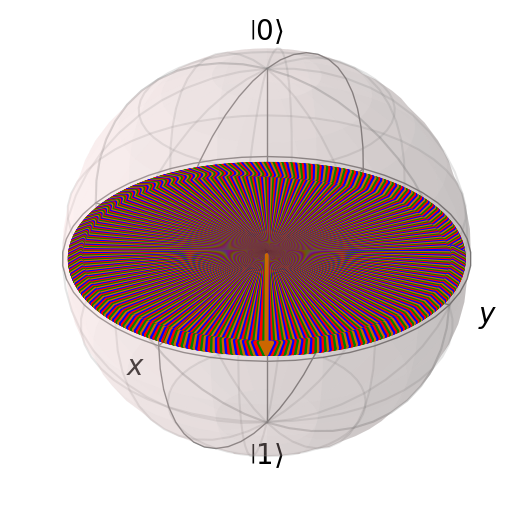

In [202]:
# Define Hamiltonian for NV center and nitrogen (spin-1/2 system)
D = 2.87  # NV center zero-field splitting
g_e = -28.03
gyromag_ratio_N15_val = -4.316e-3  # Nitrogen spin splitting
Q = -4.945e-3 # Quadrupole moment of N14 ≠ 0, in Hz

B = 0.1
# Tensor product of identity and Pauli matrices for NV and Nitrogen
H_NV = (D * (Sz**2 - 2/3 * qt.qeye(3)) + g_e * B * Sz) * _2PI
H_N15 = (Q * (Z**2 - 2/3) + gyromag_ratio_N15_val * B * Z)*_2PI

# Combined Hamiltonian
H_combined = qt.tensor(H_NV, qt.qeye(2)) + qt.tensor(qt.qeye(3), H_N15)

times = np.linspace(0, 1/(gyromag_ratio_N15_val * B), 100)
# Solve the Schrodinger equation for combined system
initial_state_combined = qt.tensor(qt.basis(3, 0), (qt.basis(2, 0) + qt.basis(2, 1).unit()))  # Initial state
try:
    result_combined = qt.mesolve(H_combined, initial_state_combined, times).states
except Exception:
    print("Failed, switching ns -> mus; GHz -> MHz")
    print("Or switching to more steps")
    factor = 1e0
    times = np.linspace(0, 1/(gyromag_ratio_N15_val * B), 1000)
    result_combined = qt.mesolve(H_combined*factor, initial_state_combined, times/factor).states

result_N15 = [qt.ptrace(state, [1]) for state in result_combined]

b= Bloch()
b.add_states(result_N15)
b.show()